# 🎯 Неделя 1. Семинар 2.

**Сегодня в программе:**
1. Типы задач в ML.
2. Валидация моделей.
3. Классификация: метрики и проблема дисбаланса.
2. Регрессия: метрики и проблема выбросов в таргете.

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import (
    datasets, metrics, model_selection,
    linear_model, preprocessing
)

## 🟢 1. Типы задач в ML

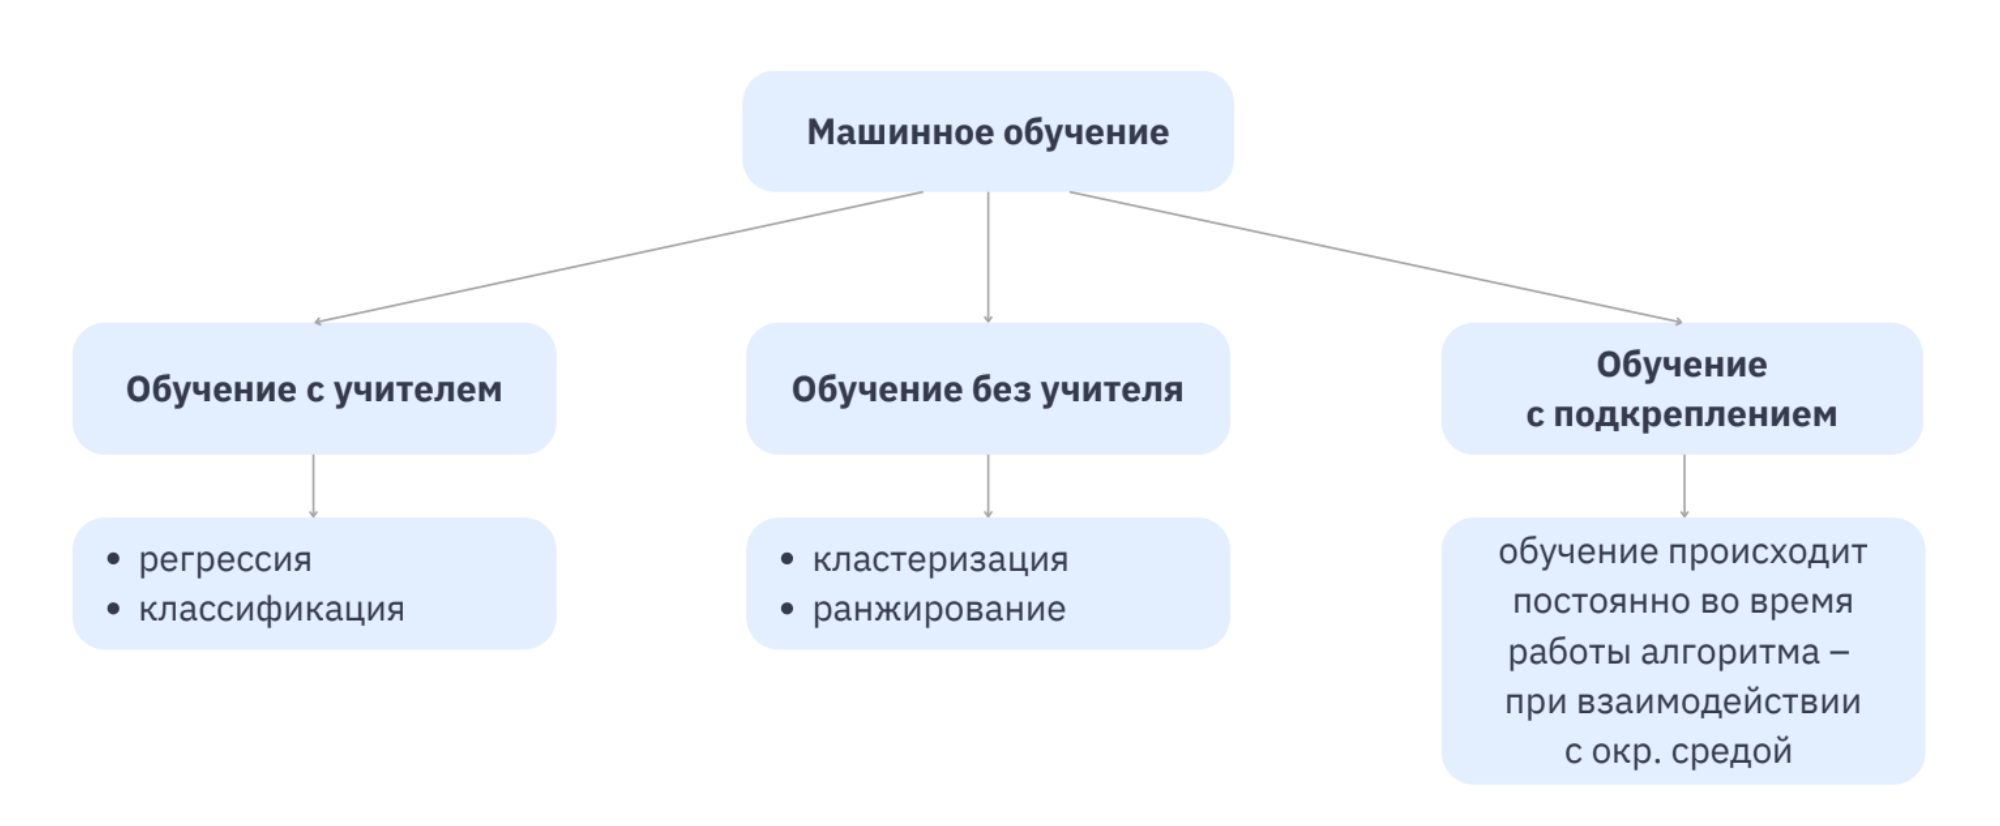

### Обучение с учителем (Supervised Learning)
Есть **таргет** — правильный ответ, который модель должна научиться предсказывать.

#### Регрессия
- Таргет — **вещественное число**
- Модель предсказывает числовое значение

**Примеры:**
- прогноз цены квартиры  
- предсказание спроса  
- оценка времени доставки  

#### Классификация
- Таргет — **ограниченное множество значений (классов)**
- Модель выбирает класс объекта

**Примеры:**
- спам / не спам  
- уйдёт клиент / не уйдёт  
- диагноз по симптомам  

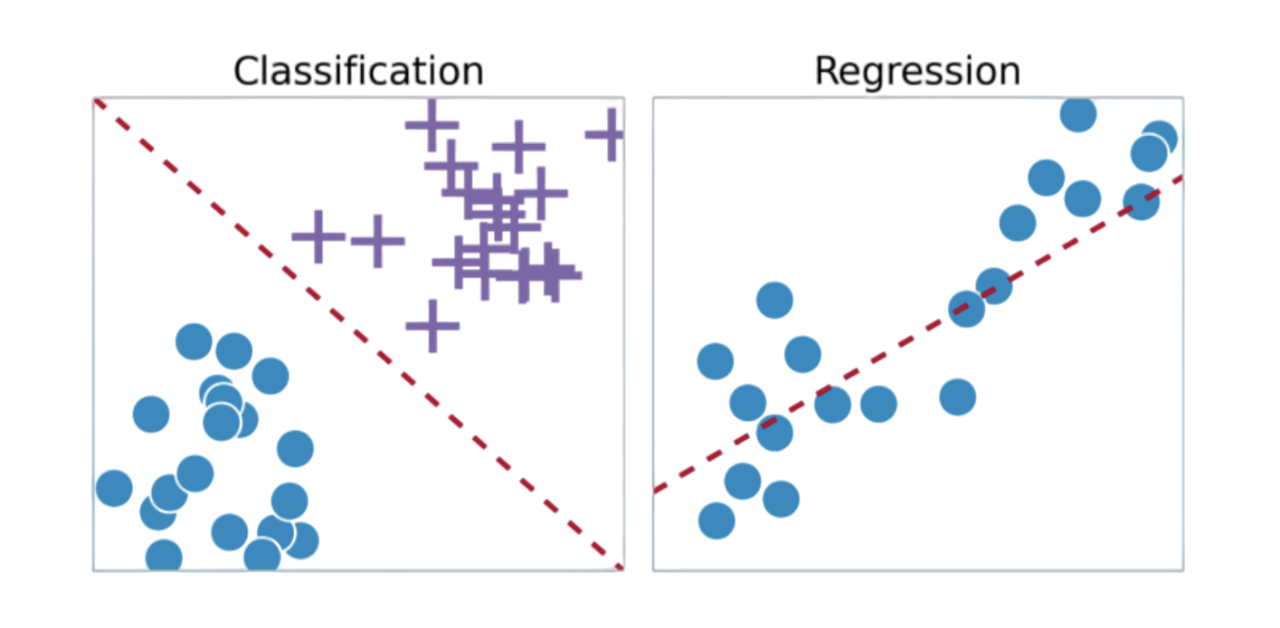

### Обучение без учителя (Unsupervised Learning)
**Таргета нет** — правильных ответов заранее не задано.

#### Кластеризация
- Данные автоматически делятся на группы по **похожести**
- Цель — найти структуру в данных

**Примеры:**
- сегментация клиентов  
- группировка товаров  
- поиск аномалий (как отдельные кластеры)  



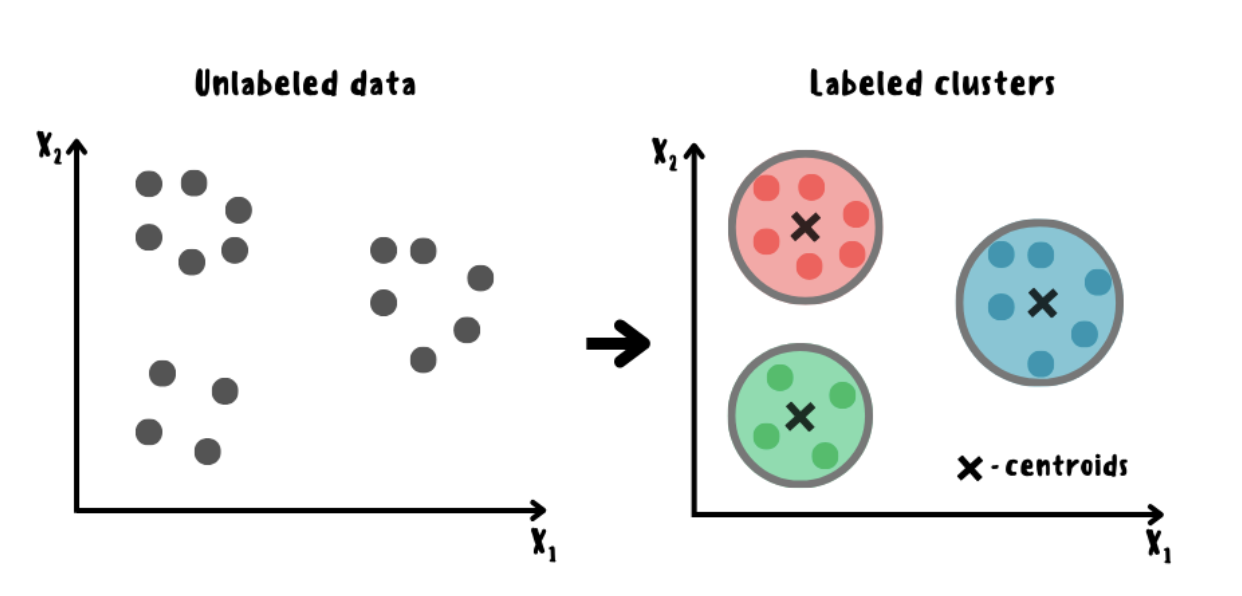

### Обучение с подкреплением (Reinforcement Learning)
Модель **не получает правильных ответов напрямую**, а учится через взаимодействие со средой.

- Есть **агент**, **среда**, **действия** и **награда**
- Цель — максимизировать суммарную награду
- Обучение идёт через пробы и ошибки

**Примеры:**
- игры (шахматы, Go, Atari)
- управление роботами
- оптимизация стратегий (реклама, трейдинг)

---

### Тренировка!
Определите где: КЛАССИФИКАЦИЯ, ОБУЧЕНИЕ С ПОДКРЕПЛЕНИЕМ, КЛАСТЕРИЗАЦИЯ, РЕГРЕССИЯ

1. Определение настроения отзыва (положительный/отрицательный).
2. Рекомендательная система музыки, которая сразу реагирует на ваш лайк/дизлайк.
3. Объединить похожих по поведению клиентов в группы.
4. Прогнозировать длительность поездки на такси.



## 🟢 2. Валидация моделей.

### Зачем делить данные
Модель должна не только хорошо запоминать обучающие данные, но и **обобщать на новые, ранее невиданные примеры**.  
Поэтому данные разделяют на части с разными ролями.

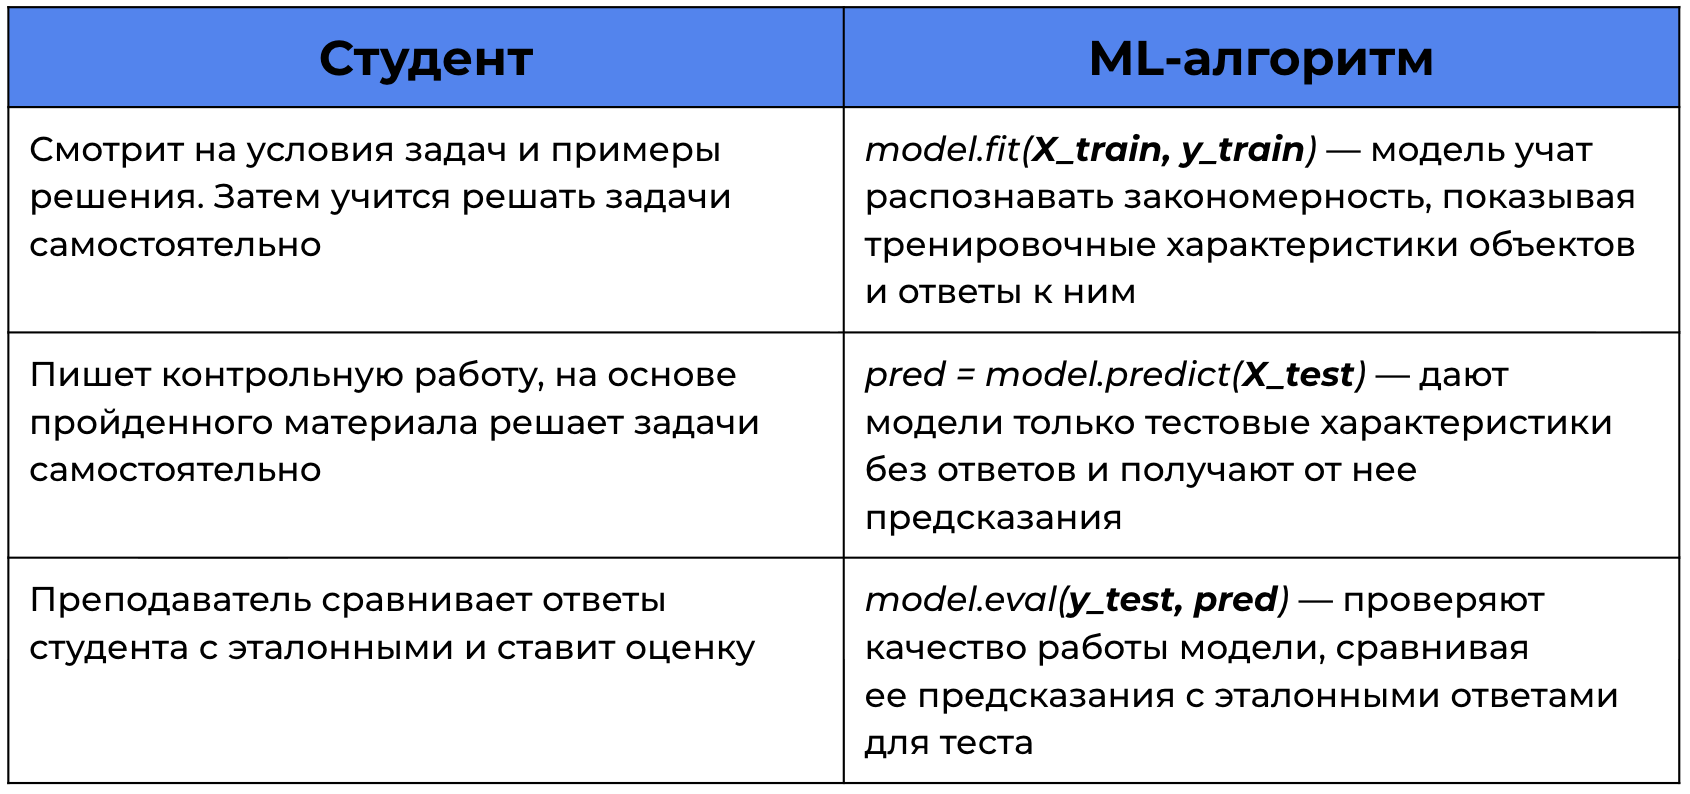

### 1. Hold-out
### 1.1. Двухкомпонентный подход (Train / Test)
- **Train** — для обучения модели  
- **Test** — для проверки качества на новых данных  

### 1.2. Трехкомпонентный подход (Train / Validation / Test)
- **Validation** — для подбора гиперпараметров модели, т.к. если тест используется для подбора гиперпараметров, он перестаёт быть независимым.

> PS:
> - **Параметры модели** — значения, которые модель обучает сама (веса, коэффициенты).
> - **Гиперпараметры** — настройки, задаваемые до обучения (глубина дерева, коэффициент регуляризации и т.д.).

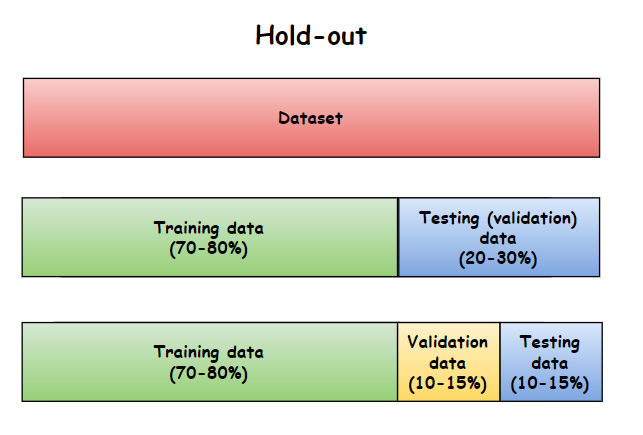

Покажем на примере простого датасета для **прогнозирования стоимости домов в Калифорнии** (задача регрессии) как разделять датафрейм на **обучающую и тестовую выборки** и как грамотно применять преобразования к каждой.

In [83]:
data = datasets.fetch_california_housing(as_frame=True)
df_reg = data.frame

print(df_reg.shape)
df_reg.head()

(20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [84]:
X = df_reg.drop(columns="MedHouseVal") # признаки
y = df_reg["MedHouseVal"] # таргет

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.2, random_state=42
) # разделение на train и test

# Преобразования (стадартизация)
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # "обучение" на train 
                                                # + трансформация
X_test_scaled = scaler.transform(X_test)        # на test только трансформация

In [85]:
class MeanRegressor:
    """
    Константная регрессионная модель:
    предсказывает среднее по train + bias
    """
    def __init__(self, bias=0.0):
        self.bias = bias
        self.mean_ = None

    def fit(self, X, y):
        self.mean_ = np.mean(y)
        return self

    def predict(self, X):
        return np.full(shape=len(X), fill_value=self.mean_ + self.bias)

In [86]:
# Обучение baseline-модели
model = MeanRegressor(bias=0.0)
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Оценка качества по MSE
mse_train = metrics.mean_squared_error(y_train, y_train_pred)
mse_test = metrics.mean_squared_error(y_test, y_test_pred)

print(f"MSE on train: {mse_train:.3f}")
print(f"MSE on test : {mse_test:.3f}")

MSE on train: 1.337
MSE on test : 1.311


Теперь посмотрим, как разделить на **обучающую, валидационную и тестовую выборки**:

In [87]:
# train_test_split умеет разделять только на 2 части
X_temp, X_test, y_temp, y_test = model_selection.train_test_split(
    X, y, test_size=0.2, random_state=42
)

# поэтому применяем функцию 2 раза!
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42
)

In [88]:
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

Выполним вручную подбор гиперпараметра `bias` модели `MeanRegressor` на **валидационной выборке** (с самой моделью и её гиперпараметрами познакомимся на следующей неделе):

In [89]:
biases = [-2.0, -1.0, -0.5, 0.0, 0.5, 1.0, 2.0]

best_bias = None
best_mse = np.inf

for bias in biases:
    model = MeanRegressor(bias=bias)
    model.fit(X_train_scaled, y_train)

    y_valid_pred = model.predict(X_valid_scaled)
    mse_valid = metrics.mean_squared_error(y_valid, y_valid_pred)

    print(f"bias={bias}: MSE valid = {mse_valid}")

    if mse_valid < best_mse:
        best_mse = mse_valid
        best_bias = bias

print(f"Лучший bias по валидации: {best_bias}")

bias=-2.0: MSE valid = 5.435268028323805
bias=-1.0: MSE valid = 2.4043118832979653
bias=-0.5: MSE valid = 1.6388338107850458
bias=0.0: MSE valid = 1.3733557382721264
bias=0.5: MSE valid = 1.6078776657592069
bias=1.0: MSE valid = 2.3423995932462875
bias=2.0: MSE valid = 5.311443448220449
Лучший bias по валидации: 0.0


### K-Fold кросс-валидация (перекрестный контроль)

Это стандартный способ оценки качества модели и подбора гиперпараметров.

### Общая схема
1. Данные сначала делятся на **Train** и **Test**
2. **K-Fold применяется только к Train**
3. **Test** используется один раз для финальной оценки


### Алгоритм K-Fold
- Обучающая выборка делится на `k` равных частей (**фолдов**)
- Выполняется `k` итераций:
  - один фолд — валидационный
  - остальные `k-1` — тренировочные
- На каждой итерации модель обучается и оценивается
- Итоговое качество — среднее по всем фолдам

Каждый объект обучающей выборки **ровно один раз** попадает в валидацию.

Это позволяет оценить стабильность модели, снижает зависимость результата от одного разбиения и заменяет отдельную валидационную выборку.

### Выбор числа фолдов
- большие датасеты: `k = 10`
- маленькие датасеты: `k = 3` или `5`

Чем больше `k`,тем точнее оценка качества и больше времени на обучение.



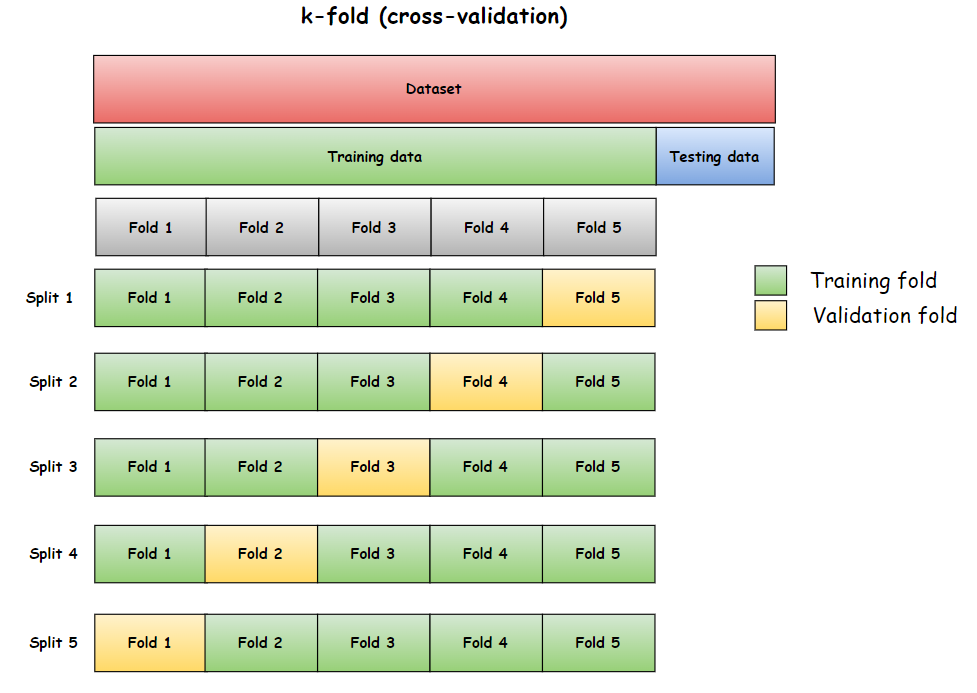

### Реализация в sklearn
Кросс-валидатор `KFold` и удобная функция `cross_validate`

**Основные параметры `cross_validate`:**
- `estimator` — модель
- `X`, `y` — данные и таргет
- `cv` — число фолдов или объект `KFold`
- `scoring` — метрика качества
- `return_train_score` — считать ли метрики на train

**Функция возвращает словарь:**
- `test_score` — метрики на валидационных фолдах
- `train_score` — метрики на тренировочных фолдах
- `fit_time` — время обучения
- `score_time` — время вычисления метрик

In [90]:
# делим ТОЛЬКО на train и test
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, random_state=42
)

# масштабирование
scaler = preprocessing.StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Покажем на примере настоящей модели линейной регрессии из `sklearn`, т.к. для `cross_validate` нужны классы с определенными методами (которые есть у алгоритмов из `sklearn`).

In [91]:
lr_model = linear_model.LinearRegression()

# K-Fold кросс-валидация на train
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=42)

cv_metrics = model_selection.cross_validate(
    estimator=lr_model,
    X=X_train_scaled,
    y=y_train,
    cv=kf,
    scoring='neg_mean_squared_error',          # метрика для регрессии
    return_train_score=True,
    n_jobs=-1
)

cv_metrics

{'fit_time': array([0.00352311, 0.00384498, 0.00428152, 0.00436592, 0.00353312]),
 'score_time': array([0.00071812, 0.00073004, 0.00079966, 0.00068545, 0.00071883]),
 'test_score': array([-0.49585031, -0.50454002, -0.54690274, -0.51751025, -0.54605112]),
 'train_score': array([-0.52694434, -0.52486176, -0.51429481, -0.52139976, -0.51441324])}

> PS: **`neg`**`_mean_squared_error`, потому что `scoring` всегда "чем больше — тем лучше", а MSE — метрика, которую нужно минимизировать.

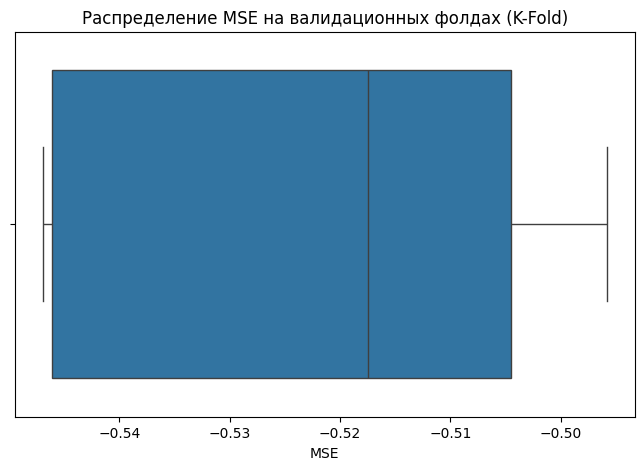

In [92]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=cv_metrics['test_score'])
plt.title('Распределение MSE на валидационных фолдах (K-Fold)')
plt.xlabel('MSE')
plt.show()

В массивах, хранящихся по ключам `train_score` и `test_score`, содержится по
5 значений метрики MSE, полученных на тренировочных и валидационных фолдах  на каждой итерации кросс-валидации соответственно.

Рассчитаем среднее и сравним его с результатом, полученным ранее:



In [93]:
print(f"Среднее качество на тренировочной выборке: {-cv_metrics['train_score'].mean()}")
print(f"Среднее качество на валидационной выборке: {-cv_metrics['test_score'].mean()}")

Среднее качество на тренировочной выборке: 0.5203827831060592
Среднее качество на валидационной выборке: 0.5221708872445648


~Если метрика на обучении значительно выше, чем на валидации - это признак переобучения.~

## 🟢 3. Метрики

Посмотрим на метрики дя двух основных задач обучения с учителем - регрессии и классификации.


### Метрики регрессии

Для чистоты эксперимента заново обучим baseline-модель:

In [94]:
X = df_reg.drop(columns="MedHouseVal") # признаки
y = df_reg["MedHouseVal"] # таргет

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.2, random_state=42
) # разделение на train и test

# Преобразования (стадартизация)
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # "обучение" на train
X_test_scaled = scaler.transform(X_test) # на test просто трансформация

# Обучение baseline-модели
model = MeanRegressor(bias=0.0)
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

Для оценки качества решения задачи регрессии существует множество метрик. Рассмотрим самые основные и часто используемые.

Всех их можно считать через функции модуля `metrics` библиотеки `sklearn`.


#### Средняя абсолютная ошибка — MAE (Mean Absolute Error)

Это самый простой показатель. Чтобы посчитать данную метрику, нужно найти все остатки (разницы между предсказанным значением и реальным), взять от каждого из них модуль, сложить их и поделить на количество. Т.е., нужно найти среднее арифметическое модуля отклонения предсказанного значения от реального.

$$MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y_i}|$$

Данная метрика интерпретируется очень легко: это число показывает, насколько в среднем наша модель ошибается. Чем меньше значение метрики, тем лучше.



In [95]:
print("MAE train:", metrics.mean_absolute_error(y_train, y_train_pred))
print("MAE test:", metrics.mean_absolute_error(y_test, y_test_pred))

MAE train: 0.913911498872179
MAE test: 0.9060685490007149


Много ли это? Хороший вопрос, на который без эксперта будет сложно дать ответ. Однако можно посчитать ошибку в процентах.

#### Средняя абсолютная ошибка в процентах — MAPE (Mean Absolute Percent Error)

Для её вычисления мы делим модуль разницы между предсказанием алгоритма и истинным значением на истинное значение. Затем складываем все результаты (для каждого объекта), делим на количество и умножаем на 100.


$$MAPE = \frac{1}{n}\sum_{i=1}^{n}\left|\frac{y_i - \hat{y_i}}{y_i}\right|\times100$$

Эта метрика показывает, на сколько процентов в среднем наше предсказание отклоняется от реального значения.

In [96]:
print("MAPE train:", metrics.mean_absolute_percentage_error(y_train, y_train_pred))
print("MAPE test:", metrics.mean_absolute_percentage_error(y_test, y_test_pred))

MAPE train: 0.6208148753859135
MAPE test: 0.628861496325994


#### Средняя квадратическая ошибка — MSE



Логика вычисления данной ошибки очень похожа на предпредыдущую. Разница лишь в том, что вместо модуля разности между предсказанным и реальным значениями мы берём квадрат этого модуля:

$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2$$


Данная метрика хуже поддаётся интерпретации, так как измеряется не в единицах, а в квадратах единиц.



In [97]:
print("MSE train:", metrics.mean_squared_error(y_train, y_train_pred))
print("MSE test:", metrics.mean_squared_error(y_test, y_test_pred))

MSE train: 1.3367782117894271
MSE test: 1.3106960720039365


#### Корень из средней квадратической ошибки — RMSE (Root Mean Squared Error)

Для получения RMSE надо просто извлечь квадратный корень из MSE:

$$
RMSE =
\sqrt{
\frac{1}{n}
\sum_{i=1}^{n}
\left(y_i - \hat{y}_i\right)^2
}
$$

Корень извлекается для того, чтобы привести размерности ответов и ошибок в соответствие и сделать метрику более понятной.




In [98]:
print("RMSE train:", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("RMSE test:", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE train: 1.1561912522543263
RMSE test: 1.1448563543099792


#### Коэффициент детерминации ($R^2$)



Коэффициент детерминации, или $R^2$, является одной из самых распространённых метрик. Он тесно связан с MSE, но его преимущество в том, что он всегда находится в промежутке между от $-\infty$ до 1.

$$R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y_i})^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}$$

где $\bar{y}$ - среднее по вектору правильных ответов.

То есть коэффициент детерминации показывает, **насколько наша модель лучше, чем константная модель среднего** (наш baseline:)).

Есть ещё одна интерпретация данной метрики: коэффициент детерминации показывает, какую долю информации о зависимости (дисперсии) смогла уловить модель.

* Удовлетворительным  считается показатель **выше 0.5**: чем ближе к 1, тем лучше.
* Отрицательные значения  говорят о том, что построенная модель настолько плоха, что лучше было бы присвоить всем ответам среднее значение.



In [99]:
print("R^2 train:", metrics.r2_score(y_train, y_train_pred))
print("R^2 test:", metrics.r2_score(y_test, y_test_pred))

R^2 train: 0.0
R^2 test: -0.00021908714592466794


Весь список метрик для задач регрессии из sklearn можно найти [здесь](https://scikit-learn.ru/3-3-metrics-and-scoring-quantifying-the-quality-of-predictions/#regression-metrics). Но мы рассмотрели самые часто применяемые на практике.


### Метрики классификации

Теперь поговорим про метрики для классификации. Для этого загрузим ещё один простейший датасет для классификации наличия/отсутствия болезни (1/0 - задача бинарной классификации).

In [100]:
data = datasets.load_breast_cancer()

df_classif = pd.DataFrame(
    data=data.data,
    columns=data.feature_names
)
df_classif['target'] = data.target

print(df_classif.shape)
df_classif.head()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Сразу полезно посмотреть на количество классов и их сбалансированность:

In [101]:
df_classif['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

Построим baseline для задачи классификации:

In [102]:
class RandomClassifier:
    """
    Константный классификатор:
    случайно предсказывает один из классов,
    встречающихся в train
    """
    def __init__(self, random_state=None):
        self.random_state = random_state
        self.classes_ = None
        self.rng_ = np.random.default_rng(random_state)

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        return self

    def predict(self, X):
        return self.rng_.choice(self.classes_, size=len(X))

In [103]:
X = df_classif.drop(columns="target")
y = df_classif["target"]

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [104]:
model = RandomClassifier(random_state=42)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

А теперь - к метрикам!

#### Ошибки I И II рода



Итак, у нас есть пациенты, и мы хотим понять, больны ли они:

* **нулевая гипотеза** - отсутствие эффекта (пациент здоров)
* **альтернативная гипотеза** — наличие эффекта (пациет болен).

Тогда у нас есть два случая, в которых мы можем допустить ошибку:

* **ошибка I рода**: отклонение нулевой гипотезы, когда она на самом деле верна, или ложноположительный результат - т.е. мы предсказали, что у пациета есть заболевание, но его на самом деле нет.  
* **ошибка II рода**: принятие нулевой гипотезы, когда она на самом деле ложна, или ложноотрицательный результат - т.е. мы предсказали, что пациент здоров, хотя на самом деле он болен.


> ***В диагностических задачах для нас критичнее ошибка II рода. Последствия будут более серьёзными, если мы примем больного пациента за здорового, чем если мы примем здорового за больного.***

Матрица ошибок (confusion matrix) показывает все возможные исходы совпадения и несовпадения предсказания модели с действительностью. Для задачи **бинарной классификации**:

* **Истинно положительные (True Positive, TP)** — это объекты, обозначенные моделью как класс 1 и действительно принадлежащие к классу 1.  
* **Ложноположительные (False Positive, FP)** — это объекты, обозначенные моделью как класс 1, но в действительности принадлежащие к классу 0 (т.е.объекты, для которых модель совершила ошибку I рода).  
* **Истинно отрицательные (True Negative, TN)** — это объекты, обозначенные моделью как класс 0 и действительно принадлежащие к классу 0.  
* **Ложноотрицательные (False Negative, FN)** — это объекты, обозначенные моделью как класс 0, но в действительности принадлежащие к классу 1 (т.е.объекты, для которых модель совершила ошибку II рода).

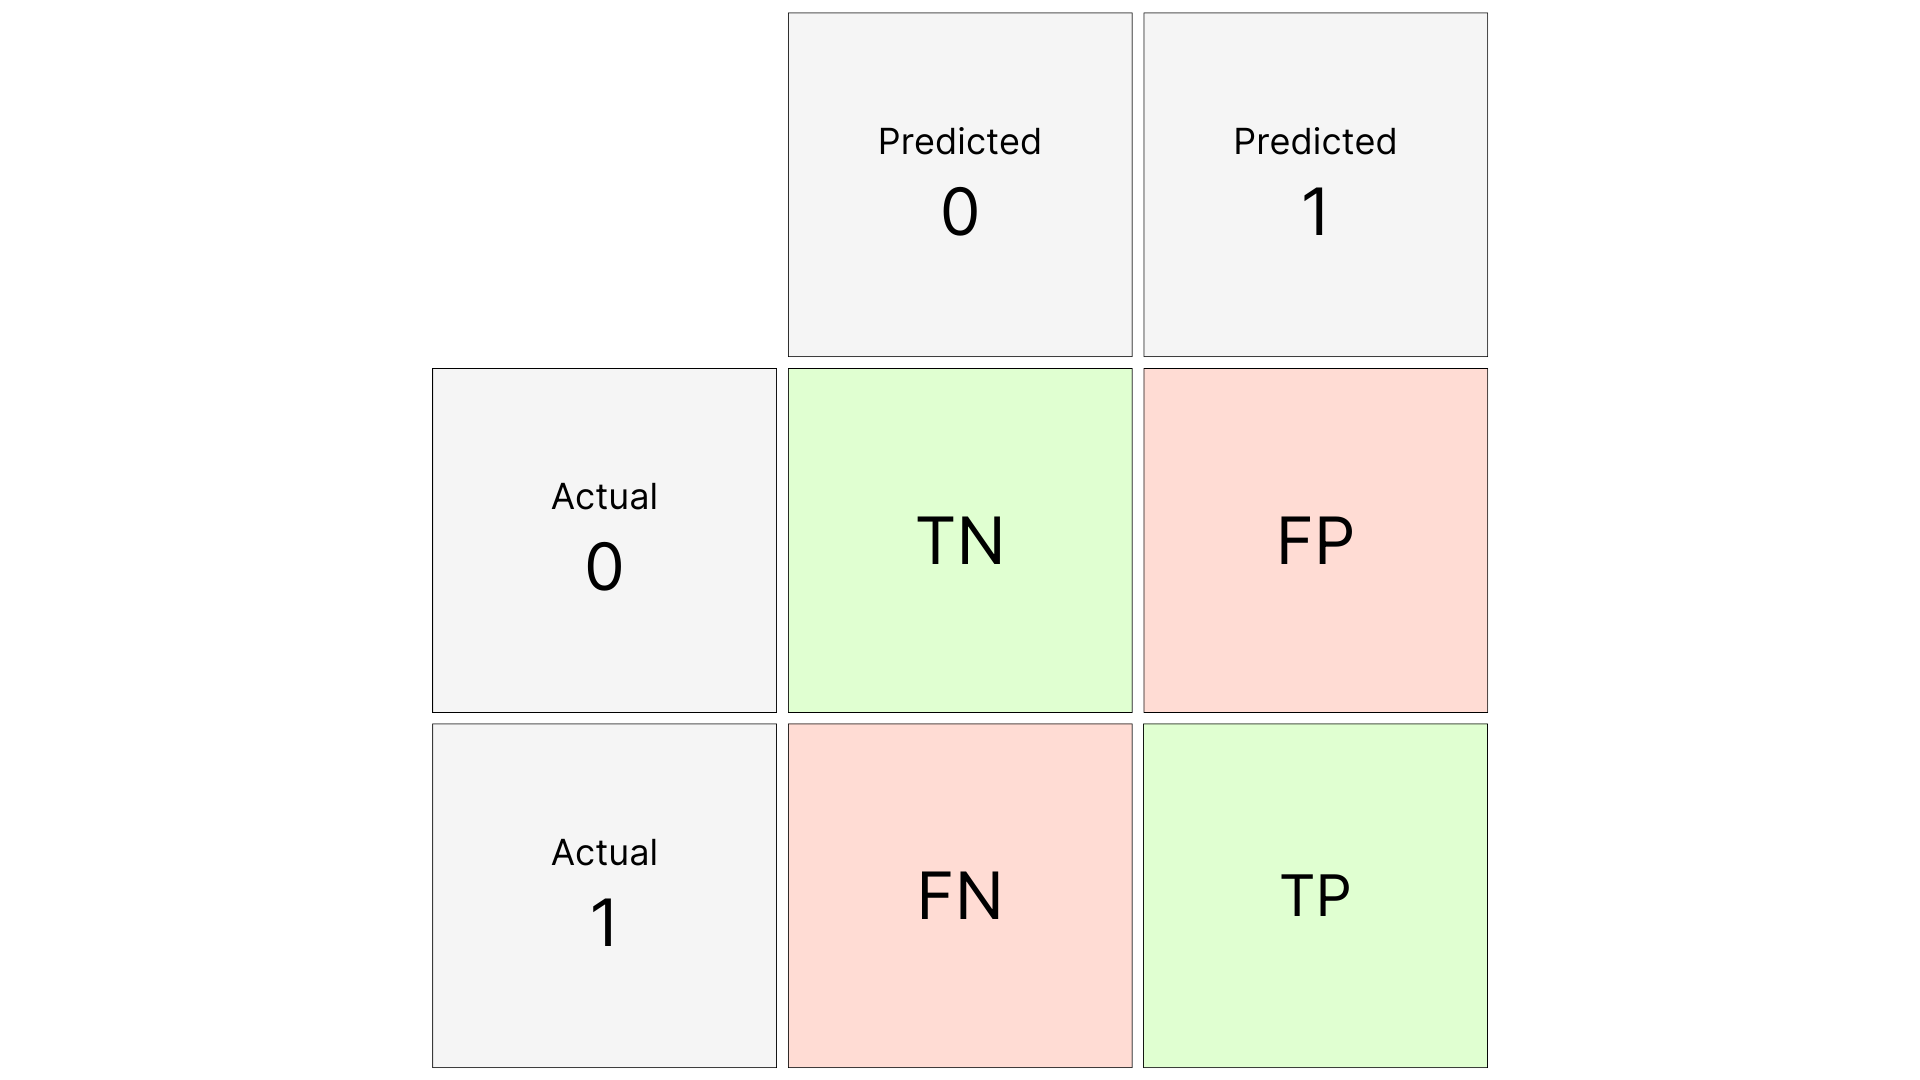

In [105]:
# матрица ошибок на test
cm = metrics.confusion_matrix(y_test, y_test_pred)
cm

array([[17, 25],
       [39, 33]])

In [106]:
pd.DataFrame(
    cm,
    index=[f"true_{c}" for c in model.classes_],
    columns=[f"pred_{c}" for c in model.classes_]
)

,pred_0,pred_1
true_0,17,25
true_1,39,33


Формально матрица ошибок не является метрикой, но на её основе составляются сами метрики классификации - перейдём к ним.



#### Accuracy

Это доля правильных ответов модели среди всех ответов. Правильные ответы — это истинно положительные (True Positive) и истинно отрицательные ответы (True Negative):

$$accuracy = \frac{TP + TN}{TP + TN + FN + FP}$$

> *Интерпретация: как много (в долях) модель угадала ответов.*

Метрика изменяется в диапазоне от 0 до 1. Чем ближе значение к 1, тем больше ответов модель угадала.






In [107]:
print(f'Accuracy train: {metrics.accuracy_score(y_train, y_train_pred)}')
print(f'Accuracy test: {metrics.accuracy_score(y_test, y_test_pred)}')

Accuracy train: 0.5186813186813187
Accuracy test: 0.43859649122807015


Accuracy — самая простая и самая понятная метрика классификации, но у неё есть один существенный недостаток: **она бесполезна, если классы сильно несбалансированы.**


#### Precision

Precision — это доля объектов, которые действительно являются положительными, по отношению ко всем объектам, названным моделью положительными.

$$precision = \frac{TP}{TP+FP}$$

Метрика также изменяется от 0 до 1.

> *Интерпретация: способность отделить класс 1 от класса 0. Чем больше precision, тем меньше ложных попаданий. То есть чем ближе precision к 1, тем меньше вероятность модели допустить ошибку I рода.*

Относительно нашего примера, precision показывает, какую часть из приглашенных на обследование пациентов мы потревожили не зря. Чем больше precision, тем меньше потревоженных пациентов будет. Для нас это степень уверенности в том, что объект, который классификатор определил к классу 1 **действительно принадлежит этой группе**.

Precision нужен в задачах, где от нас требуется минимум ложных срабатываний. Чем выше "цена" ложноположительного результата, тем выше должен быть precision.



In [108]:
print(f'Precision train: {metrics.precision_score(y_train, y_train_pred)}')
print(f'Precision test: {metrics.precision_score(y_test, y_test_pred)}')

Precision train: 0.65
Precision test: 0.5689655172413793


#### Recall (полнота)

Это доля объектов, названных классификатором положительными, по отношению ко всем объектам положительного класса.

$$recall = \frac{TP}{TP + FN}$$

Метрика изменяется от 0 до 1.

> *Интерпретация: способность модели обнаруживать класс 1 вообще, т.е. охват класса 1. Заметьте, что метрика зависит от количества ложноотрицательных срабатываний. То есть чем ближе recall к 1, тем меньше вероятность модели допустить ошибку II рода.*

Recall очень хорошо себя показывает в задачах, где важно найти как можно больше объектов, принадлежащих к классу 1.



In [109]:
print(f'Recall train: {metrics.recall_score(y_train, y_train_pred)}')
print(f'Recall test: {metrics.recall_score(y_test, y_test_pred)}')

Recall train: 0.5017543859649123
Recall test: 0.4583333333333333


#### F1-мера

Метрики precision и recall не зависят от сбалансированности классов и в совокупности дают довольно исчерпывающее представление о классификаторе. Однако на практике часто бывает так, что **увеличение одной из метрик может привести к уменьшению другой**.

Концентрация только на одной метрике (precision или recall) без учёта второй — сомнительная идея:
* В битве за максимум precision для класса 1 побеждает модель, которая всегда будет говорить «нет». У неё вообще не будет ложноположительных срабатываний.
* В битве за максимум recall для класса 1 побеждает модель, которая всегда будет говорить «да». Она охватит все наблюдения класса 1, и у неё не будет ложноотрицательных срабатываний.

В реальности необходимо балансировать между двумя этими метриками. И тут помогает F1-мера — это взвешенное среднее гармоническое между precision и recall:

$$F_{1} = 2\cdot\frac{precision \cdot recall}{precision + recall}$$

**В чём преимущество F1-меры?**

Метрика равна своему максимуму (1), если и precision, и recall равны 1 (то есть когда отсутствуют как ложноположительные, так и ложноотрицательные срабатывания). Но если хотя бы одна из метрик будет близка к 0, то и  будет близка к 0.

1. При одинаковых $recall$ значение $f1$ должно быть выше у того алгоритма, у которого выше $precision$.
2. При одинаковых $precision$ значение $f1$ должно быть выше у того алгоритма, у которого выше $recall$.
3. $f1$ должна быть больше у того алгоритма, для которого поддерживается баланс между $precision$ и $recall$ при условии максимизации обеих.


Несмотря на отсутствие бизнес-интерпретации, метрика является довольно распространённой и используется в задачах, где необходимо выбрать модель, которая балансирует между precision и recall.

In [110]:
print(f'F1 train: {metrics.f1_score(y_train, y_train_pred)}')
print(f'F1 test: {metrics.f1_score(y_test, y_test_pred)}')

F1 train: 0.5663366336633663
F1 test: 0.5076923076923077


Для облегчения расчёта метрик можно использовать функцию `classification_report()` из модуля metrics. Она возвращает отчёт обо всех метриках классификации:



In [111]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.30      0.40      0.35        42
           1       0.57      0.46      0.51        72

    accuracy                           0.44       114
   macro avg       0.44      0.43      0.43       114
weighted avg       0.47      0.44      0.45       114



`macro avg` — это среднее значение метрики между классами 1 и 0.  
`weighted avg` — это средневзвешенное значение метрики между классами 1 и 0. Вес каждого класса определяется на основе доли объекта i-ого класса в выборке.

Ранее мы говорили о метриках precision, recall и  только в контексте класса 1 (человек болен). В отчёте `classification_report()` эти метрики рассчитаны и для класса 0. Смысл остаётся тем же, просто заменяем в рассуждениях класс 1 на класс 0.